In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv("fifa_eda.csv")

In [10]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [11]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [34]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

# Top 5 countires with highest number of football players?

In [38]:
df["Nationality"].value_counts()[:5]

England      1655
Germany      1195
Spain        1071
Argentina     935
France        910
Name: Nationality, dtype: int64

# Top 5 oldest players and top 10 youngest players?

In [39]:
df["Name"][df["Age"].sort_values(ascending=False).index].head()

4741         O. Pérez
10545     S. Narazaki
7225         C. Muñoz
15426        M. Tyler
4187     C. Lucchetti
Name: Name, dtype: object

In [40]:
df["Name"][df["Age"].sort_values().index].head(10)

18206         G. Nugent
18044           K. Lara
16254         S. Steijn
16418       J. Kitolano
17776    M. Köstenbauer
12496    Pelayo Morilla
16927         B. Nygren
17757          L. Smyth
17753          B. Waine
15363         Y. Roemer
Name: Name, dtype: object

# Line plot on age

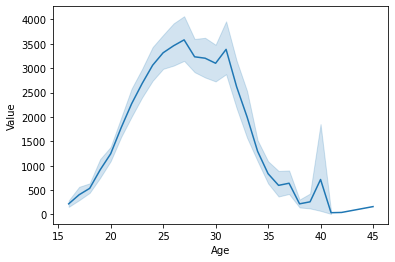

In [48]:
sns.lineplot(df["Age"],df["Value"])
plt.show()

# Which player plays for highest club

In [296]:
df.groupby("Name")["Club"].value_counts()

Name            Club                  
A. Abang        New York Red Bulls        1
A. Abdellaoui   FC Sion                   1
A. Abdennour    Olympique de Marseille    1
A. Abdi         Sheffield Wednesday       1
A. Abdu Jaber   Al Wehda                  1
                                         ..
Óscar Gil       Elche CF                  1
Óscar Pinchi    Atlético Madrid           1
Óscar Plano     Real Valladolid CF        1
Óscar Valentín  CF Rayo Majadahonda       1
Óscar Whalley   Aarhus GF                 1
Name: Club, Length: 17890, dtype: int64

# Clubs with highest number of player

In [90]:
df["Club"].value_counts().max()

33

In [118]:
df["Club"].value_counts().head(30)

FC Barcelona               33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
RC Celta                   33
Rayo Vallecano             33
Fortuna Düsseldorf         33
Valencia CF                33
CD Leganés                 33
Empoli                     33
Burnley                    33
Borussia Dortmund          33
Eintracht Frankfurt        33
AS Monaco                  33
Chelsea                    33
Arsenal                    33
Newcastle United           33
Liverpool                  33
Tottenham Hotspur          33
Atlético Madrid            33
Real Madrid                33
Frosinone                  33
Manchester United          33
Manchester City            33
Everton                    32
West Ham United            32
FC Nantes                  32
Hertha BSC                 32
Huddersfield Town          32
Name: Club, dtype: int64

# Clubs with lowest number of player

In [119]:
df["Club"].value_counts().min()

18

In [121]:
df["Club"].value_counts(ascending=True).head(5)

Derry City          18
Limerick FC         19
Sligo Rovers        19
Grêmio              20
Atlético Mineiro    20
Name: Club, dtype: int64

# Clubs with youngest/oldest numbers of players

In [130]:
df.groupby('Club')['Age'].mean().sort_values(ascending = True).head()

Club
FC Nordsjælland             20.259259
FC Groningen                21.423077
Bohemian FC                 21.480000
FC Sochaux-Montbéliard      21.678571
FC Admira Wacker Mödling    21.807692
Name: Age, dtype: float64

In [135]:
df.groupby('Club')['Age'].mean().sort_values(ascending = False).head()

Club
Paraná                 31.6
Cruzeiro               30.6
Atlético Paranaense    30.4
Botafogo               30.4
Chapecoense            30.4
Name: Age, dtype: float64

# Players with highest/lowest wage

In [138]:
df[["Name","Wage"]].iloc[df['Wage'].sort_values(ascending = False).head(10).index]

,Name,Wage
0,L. Messi,565.0
7,L. Suárez,455.0
6,L. Modrić,420.0
1,Cristiano Ronaldo,405.0
8,Sergio Ramos,380.0
36,G. Bale,355.0
11,T. Kroos,355.0
4,K. De Bruyne,355.0
5,E. Hazard,340.0
32,Coutinho,340.0


In [139]:
df[["Name","Wage"]].iloc[df['Wage'].sort_values(ascending = True).head(10).index]

,Name,Wage
9258,R. Blanco,2.0
13684,G. Williams,3.0
13686,F. Kohls,1.0
13687,L. Zidane,9.0
13689,J. Weir,4.0
13691,B. Moore,3.0
13692,D. Mihailovic,1.0
13683,B. Maguire,1.0
13693,G. Zabret,3.0
13695,J. Brown,3.0


# Which club has highest/lowest average wage

In [143]:
df.groupby('Club')['Wage'].mean().sort_values(ascending = False).head()

Club
Real Madrid          152.030303
FC Barcelona         146.575758
Juventus             131.680000
Manchester City      113.363636
Manchester United    102.757576
Name: Wage, dtype: float64

In [216]:
df.groupby('Club')['Wage'].mean().sort_values(ascending = True).head()

Club
Cork City                 1.0
St. Patrick's Athletic    1.0
Spartak Moscow            1.0
Sparta Praha              1.0
Sligo Rovers              1.0
Name: Wage, dtype: float64

# Which team has left Preferred Foot

In [300]:
for i in df["Club"].unique():
    print(df[["Club","Preferred Foot"]][df["Club"]==i])
    #(df["Preferred Foot"][df["Club"]==i].mode())

               Club Preferred Foot
0      FC Barcelona           Left
7      FC Barcelona          Right
18     FC Barcelona          Right
20     FC Barcelona          Right
32     FC Barcelona          Right
42     FC Barcelona           Left
49     FC Barcelona           Left
53     FC Barcelona          Right
54     FC Barcelona          Right
96     FC Barcelona          Right
155    FC Barcelona           Left
192    FC Barcelona          Right
228    FC Barcelona          Right
236    FC Barcelona           Left
239    FC Barcelona           Left
263    FC Barcelona           Left
266    FC Barcelona          Right
324    FC Barcelona          Right
613    FC Barcelona          Right
1007   FC Barcelona           Left
1037   FC Barcelona           Left
3118   FC Barcelona          Right
3684   FC Barcelona           Left
6000   FC Barcelona          Right
6102   FC Barcelona          Right
8284   FC Barcelona          Right
8289   FC Barcelona          Right
8857   FC Barcelona 

                   Club Preferred Foot
522    Beijing Renhe FC          Right
896    Beijing Renhe FC          Right
2480   Beijing Renhe FC          Right
8098   Beijing Renhe FC          Right
10213  Beijing Renhe FC          Right
10311  Beijing Renhe FC          Right
10632  Beijing Renhe FC          Right
11392  Beijing Renhe FC          Right
11947  Beijing Renhe FC          Right
12244  Beijing Renhe FC           Left
12697  Beijing Renhe FC           Left
13079  Beijing Renhe FC          Right
13320  Beijing Renhe FC          Right
13543  Beijing Renhe FC          Right
14380  Beijing Renhe FC          Right
15199  Beijing Renhe FC          Right
15205  Beijing Renhe FC          Right
16188  Beijing Renhe FC          Right
16532  Beijing Renhe FC           Left
17185  Beijing Renhe FC          Right
17242  Beijing Renhe FC          Right
17494  Beijing Renhe FC          Right
17504  Beijing Renhe FC          Right
17558  Beijing Renhe FC          Right
17695  Beijing Renhe FC  

                  Club Preferred Foot
1226   Tianjin TEDA FC           Left
2450   Tianjin TEDA FC           Left
11136  Tianjin TEDA FC           Left
11603  Tianjin TEDA FC          Right
11639  Tianjin TEDA FC          Right
13368  Tianjin TEDA FC           Left
13481  Tianjin TEDA FC          Right
13601  Tianjin TEDA FC          Right
14135  Tianjin TEDA FC          Right
14396  Tianjin TEDA FC          Right
14592  Tianjin TEDA FC          Right
14813  Tianjin TEDA FC          Right
14874  Tianjin TEDA FC          Right
15124  Tianjin TEDA FC          Right
15376  Tianjin TEDA FC          Right
15397  Tianjin TEDA FC          Right
15502  Tianjin TEDA FC          Right
16856  Tianjin TEDA FC           Left
16883  Tianjin TEDA FC          Right
16916  Tianjin TEDA FC          Right
16918  Tianjin TEDA FC          Right
17237  Tianjin TEDA FC          Right
17260  Tianjin TEDA FC          Right
17399  Tianjin TEDA FC          Right
17447  Tianjin TEDA FC          Right
17947  Tianj

                              Club Preferred Foot
1985   Gimnasia y Esgrima La Plata          Right
2873   Gimnasia y Esgrima La Plata          Right
3921   Gimnasia y Esgrima La Plata          Right
4027   Gimnasia y Esgrima La Plata          Right
4902   Gimnasia y Esgrima La Plata           Left
5001   Gimnasia y Esgrima La Plata          Right
5573   Gimnasia y Esgrima La Plata           Left
5747   Gimnasia y Esgrima La Plata          Right
6296   Gimnasia y Esgrima La Plata          Right
6489   Gimnasia y Esgrima La Plata          Right
6692   Gimnasia y Esgrima La Plata           Left
8731   Gimnasia y Esgrima La Plata          Right
9045   Gimnasia y Esgrima La Plata           Left
9192   Gimnasia y Esgrima La Plata          Right
9704   Gimnasia y Esgrima La Plata          Right
9923   Gimnasia y Esgrima La Plata          Right
10349  Gimnasia y Esgrima La Plata          Right
12680  Gimnasia y Esgrima La Plata          Right
14274  Gimnasia y Esgrima La Plata          Right


                  Club Preferred Foot
3011   Orlando Pirates          Right
3398   Orlando Pirates          Right
3429   Orlando Pirates          Right
4068   Orlando Pirates          Right
5458   Orlando Pirates          Right
5493   Orlando Pirates          Right
6609   Orlando Pirates          Right
7288   Orlando Pirates          Right
7621   Orlando Pirates          Right
7677   Orlando Pirates          Right
7681   Orlando Pirates          Right
8305   Orlando Pirates          Right
8315   Orlando Pirates          Right
8610   Orlando Pirates          Right
9399   Orlando Pirates           Left
9632   Orlando Pirates          Right
9636   Orlando Pirates           Left
9833   Orlando Pirates          Right
10230  Orlando Pirates           Left
10378  Orlando Pirates          Right
10574  Orlando Pirates          Right
10875  Orlando Pirates          Right
11684  Orlando Pirates          Right
11768  Orlando Pirates          Right
12631  Orlando Pirates           Left
13552  Orlan

                    Club Preferred Foot
4374   SG Dynamo Dresden          Right
4485   SG Dynamo Dresden          Right
4592   SG Dynamo Dresden          Right
4699   SG Dynamo Dresden           Left
5313   SG Dynamo Dresden           Left
5521   SG Dynamo Dresden          Right
5742   SG Dynamo Dresden          Right
6283   SG Dynamo Dresden          Right
6436   SG Dynamo Dresden          Right
6662   SG Dynamo Dresden          Right
6727   SG Dynamo Dresden          Right
6738   SG Dynamo Dresden          Right
6951   SG Dynamo Dresden          Right
7189   SG Dynamo Dresden          Right
7199   SG Dynamo Dresden          Right
7770   SG Dynamo Dresden           Left
8327   SG Dynamo Dresden          Right
8971   SG Dynamo Dresden          Right
9009   SG Dynamo Dresden          Right
9232   SG Dynamo Dresden          Right
9574   SG Dynamo Dresden          Right
10132  SG Dynamo Dresden          Right
11172  SG Dynamo Dresden          Right
15383  SG Dynamo Dresden           Left


           Club Preferred Foot
6887   Rochdale          Right
8167   Rochdale          Right
8281   Rochdale           Left
8858   Rochdale          Right
9260   Rochdale          Right
9369   Rochdale          Right
10363  Rochdale          Right
11058  Rochdale          Right
11509  Rochdale          Right
11960  Rochdale          Right
11991  Rochdale           Left
12058  Rochdale          Right
12190  Rochdale          Right
12237  Rochdale           Left
12890  Rochdale           Left
13472  Rochdale           Left
13731  Rochdale          Right
13944  Rochdale          Right
14151  Rochdale           Left
14610  Rochdale          Right
14712  Rochdale           Left
14909  Rochdale          Right
15888  Rochdale          Right
16544  Rochdale          Right
16656  Rochdale          Right
16662  Rochdale          Right
17229  Rochdale          Right
          Club Preferred Foot
6905   Walsall          Right
7552   Walsall          Right
7899   Walsall           Left
8497   Walsa

In [203]:
df["Club"][df["Preferred Foot"]=="Left"]

0            FC Barcelona
13        Manchester City
15               Juventus
17        Atlético Madrid
19            Real Madrid
               ...       
18172       Burton Albion
18175      Fleetwood Town
18191    Cambridge United
18200        Swindon Town
18201        Waterford FC
Name: Club, Length: 4159, dtype: object

In [241]:
df["Club"][df["Preferred Foot"]=="Right"]

1                   Juventus
2        Paris Saint-Germain
3          Manchester United
4            Manchester City
5                    Chelsea
                ...         
18202        Crewe Alexandra
18203         Trelleborgs FF
18204       Cambridge United
18205        Tranmere Rovers
18206        Tranmere Rovers
Name: Club, Length: 13748, dtype: object

# Which player has big / short height

In [244]:
df.loc[df['Height'].sort_values(ascending = False).head(10).index]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
11614,199321,T. Holý,26,Czech Republic,64,68,Gillingham,400.0,2.0,Right,1.0,1.0,GK,2017,2019-01-01,6.750000,225.0,730.000000
17927,243796,D. Hodzic,22,Croatia,51,61,Vejle Boldklub,50.0,1.0,Right,1.0,1.0,GK,2017,2018-01-01,6.750000,176.0,73.000000
4281,192613,C. Pantilimon,31,Romania,71,71,Nottingham Forest,1400.0,22.0,Right,1.0,1.0,GK,2018,2021-01-01,6.666667,212.0,2700.000000
16923,243387,S. Brolin,17,Sweden,56,78,AIK,160.0,1.0,Right,1.0,1.0,GK,2018,2018-01-01,6.666667,187.0,368.000000
17920,237127,D. Thiam,20,Senegal,51,66,SPAL,70.0,1.0,Right,1.0,1.0,GK,2016,2020-01-01,6.666667,192.0,170.000000
11403,218212,A. Noppert,24,Netherlands,64,69,Foggia,425.0,1.0,Right,1.0,1.0,GK,2018,2023-01-01,6.666667,207.0,712.000000
4189,224836,V. Milinković-Savić,21,Serbia,71,79,SPAL,2600.0,12.0,Right,1.0,1.0,GK,2016,2019-06-30,6.666667,203.0,4585.060806
17694,241870,M. Casey,18,England,53,73,Portsmouth,110.0,1.0,Right,1.0,2.0,CB,2017,2019-01-01,6.666667,176.0,303.000000
14542,237015,M. Qvist,25,Denmark,61,64,AC Horsens,325.0,2.0,Left,1.0,2.0,LCB,2017,2022-01-01,6.666667,207.0,431.000000
9559,243628,A. Vukotić,22,Serbia,66,72,Waasland-Beveren,750.0,3.0,Left,1.0,2.0,RCB,2018,2023-01-01,6.666667,209.0,1200.000000


In [245]:
df.loc[df['Height'].sort_values(ascending = True).head(10).index]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
6584,232951,H. Nakagawa,23,Japan,69,72,Kashiwa Reysol,1300.0,5.0,Right,1.0,3.0,CAM,2013,2021-01-01,5.083333,126.0,1800.0
6275,237994,N. Barrios,20,Argentina,69,82,San Lorenzo de Almagro,2000.0,7.0,Right,1.0,3.0,LM,2017,2022-01-01,5.083333,128.0,4300.0
17157,242566,K. Yamaguchi,23,Japan,55,61,Shonan Bellmare,120.0,1.0,Right,1.0,3.0,CF,2018,2021-01-01,5.083333,110.0,174.0
2768,159818,Élton,32,Brazil,73,73,Al Qadisiyah,3100.0,18.0,Left,1.0,5.0,RW,2017,2019-01-01,5.166667,132.0,5100.0
2493,202184,J. Plata,26,Ecuador,74,74,Real Salt Lake,6000.0,9.0,Right,1.0,3.0,LW,2013,2018-01-01,5.166667,134.0,9000.0
5828,228404,C. Techera,26,Uruguay,69,70,Vancouver Whitecaps FC,1200.0,4.0,Left,1.0,3.0,RM,2016,2018-01-01,5.166667,150.0,1900.0
8536,234698,C. Songkrasin,24,Thailand,67,70,Hokkaido Consadole Sapporo,975.0,2.0,Right,1.0,3.0,LW,2017,2020-01-01,5.166667,123.0,1300.0
1340,183895,M. Moralez,31,Argentina,76,76,New York City FC,7000.0,9.0,Right,2.0,4.0,LCM,2017,2018-01-01,5.166667,123.0,10500.0
7126,225150,A. Araujo,21,Portugal,68,75,GFC Ajaccio,1300.0,2.0,Right,1.0,3.0,RM,2017,2019-01-01,5.250000,117.0,2500.0
5620,222970,E. Oztumer,27,England,70,71,Bolton Wanderers,2000.0,7.0,Left,1.0,3.0,CAM,2018,2020-01-01,5.250000,132.0,4000.0


# Which player has more weight

In [253]:
df.loc[df['Weight'].sort_values(ascending = False).head().index]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
9501,156321,A. Akinfenwa,36,England,66,66,Wycombe Wanderers,230.0,2.0,Right,1.0,2.0,LS,2016,2019-01-01,5.833333,243.0,403.0
13520,239746,L. Watkowiak,22,Germany,62,68,SV Wehen Wiesbaden,300.0,1.0,Right,1.0,1.0,GK,2017,2019-01-01,6.500000,236.0,495.0
8652,179685,C. Seitz,31,United States,67,67,Houston Dynamo,475.0,2.0,Right,1.0,1.0,GK,2018,2021-01-01,6.250000,236.0,713.0
15179,211415,M. Rhead,34,England,60,60,Lincoln City,110.0,3.0,Right,1.0,2.0,ST,2015,2019-01-01,6.333333,234.0,193.0
8908,195357,F. Farnolle,33,Benin,66,66,Yeni Malatyaspor,325.0,3.0,Right,1.0,1.0,GK,2017,2019-01-01,6.416667,229.0,650.0


# Which player has high International Reputation

In [261]:
df.loc[df["International Reputation"].sort_values(ascending = False).head(1).index]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0


# Most famous Position

In [262]:
df['Position'].value_counts().head()

ST    2130
GK    1989
CB    1751
CM    1377
LB    1304
Name: Position, dtype: int64

# Which player/club has most skill moves

In [276]:
df.loc[df['Skill Moves'].sort_values(ascending = False).head(10).index]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
1998,174549,M. Fernández,32,Chile,75,75,Club Necaxa,5000.0,14.0,Right,2.0,5.0,LDM,2017,2023-01-01,5.833333,159.0,8500.0
3166,155885,A. McGeady,32,Republic of Ireland,73,73,Sunderland,3100.0,13.0,Right,2.0,5.0,LM,2017,2020-01-01,5.833333,157.0,5400.0
557,236632,David Neres,21,Brazil,79,86,Ajax,18000.0,18.0,Left,2.0,5.0,RW,2017,2022-01-01,5.750000,146.0,28800.0
559,232097,A. Harit,21,Morocco,79,86,FC Schalke 04,18000.0,27.0,Right,2.0,5.0,LCM,2017,2021-01-01,5.916667,148.0,34200.0
170,208808,Q. Promes,26,Netherlands,83,84,Sevilla FC,30500.0,28.0,Right,2.0,5.0,RM,2018,2023-01-01,5.750000,159.0,66300.0
1195,188414,C. Villanueva,32,Chile,77,77,Al Ittihad,7000.0,39.0,Left,1.0,5.0,CAM,2016,2020-01-01,5.666667,161.0,11900.0
164,213345,K. Coman,22,France,83,87,FC Bayern München,34000.0,85.0,Right,2.0,5.0,LM,2015,2023-01-01,5.833333,157.0,58700.0
1170,245221,O. Abdulrahman,26,United Arab Emirates,77,78,Al Hilal,10500.0,39.0,Left,2.0,5.0,CAM,2018,2019-01-01,5.666667,132.0,18600.0
153,20775,Quaresma,34,Portugal,84,84,Beşiktaş JK,15500.0,80.0,Right,3.0,5.0,RM,2015,2020-01-01,5.750000,148.0,29500.0
1143,238794,Vinícius Júnior,17,Brazil,77,92,Real Madrid,17500.0,66.0,Right,1.0,5.0,LW,2018,2025-01-01,5.750000,161.0,46800.0


In [281]:
df.groupby('Club')['Skill Moves'].sum().sort_values(ascending = False).head(10)

Club
Manchester United      100.0
Liverpool              100.0
Borussia Dortmund       97.0
FC Barcelona            94.0
Real Madrid             94.0
Paris Saint-Germain     93.0
Tottenham Hotspur       92.0
West Ham United         92.0
Manchester City         92.0
Chelsea                 92.0
Name: Skill Moves, dtype: float64

# Which position has International Reputation Skill Moves more Position

In [286]:
df.groupby('Position')['International Reputation'].sum().sort_values(ascending = False).head()

Position
ST    2382.0
GK    2182.0
CB    1896.0
CM    1496.0
LB    1410.0
Name: International Reputation, dtype: float64